In [ ]:
import os

In [ ]:
data_set_dir = '/content/drive/MyDrive/Project/DataSets/IMDB/'
imdb_data_path = os.path.join(data_set_dir,'IMDB Dataset.csv')
# movie_ratings_path_1 = os.path.join(data_set_dir,'ratings_1.csv')
# movie_ratings_path_2 = os.path.join(data_set_dir,'ratings_2.csv')
# movie_ratings_path_3 = os.path.join(data_set_dir,'ratings_3.csv')
# movie_ratings_path_4 = os.path.join(data_set_dir,'ratings_4.csv')
imdb_dataset_url = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/download?datasetVersionNumber=1"
cornell_movie-review-data_url = 'http://www.cs.cornell.edu/people/pabo/movie-review-data/' # Extra Exploration - not used in current analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io

def visualize_classification_report(classification_report_str):
    # Split the classification report string by lines
    lines = classification_report_str.strip().split('\n')

    # Extract class names and metrics
    class_names = []
    metrics = []

    for line in lines[2:]:
        row_data = line.strip().split()
        if len(row_data) == 0:
            break
        class_names.append(row_data[0])
        metrics.append([float(val) for val in row_data[1:]])

    # Create a DataFrame
    report_df = pd.DataFrame(metrics, columns=['Precision', 'Recall', 'F1-Score', 'Support'], index=class_names)

    # Plot using Seaborn and Matplotlib
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.2)  # Adjust font size

    # Heatmap to visualize precision, recall, and f1-score
    sns.heatmap(report_df[['Precision', 'Recall', 'F1-Score']], annot=True, fmt=".2f", cmap="Blues", cbar=False, annot_kws={"size": 16})
    plt.title('Classification Report Metrics')
    plt.ylabel('Class')
    plt.xlabel('Metrics')
    plt.show()

    # Display the support values as a bar plot
    plt.figure(figsize=(10, 4))
    sns.barplot(x=class_names, y=report_df['Support'], palette="viridis")
    plt.title('Class Support')
    plt.ylabel('Support')
    plt.xlabel('Class')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Load the IMDB Dataset
imdb_data = pd.read_csv(imdb_data_path)
imdb_data['sentiment'] = imdb_data['sentiment'].map({'positive': 1, 'negative': 0})  # convert labels to binary


In [ ]:

# Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(imdb_data['review'])

# Labels
y = imdb_data['sentiment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


In [ ]:
#Classical algo
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()



In [ ]:
# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = nb_classifier.predict(X_test)


In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
nb_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", nb_report)


Accuracy: 0.8517
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



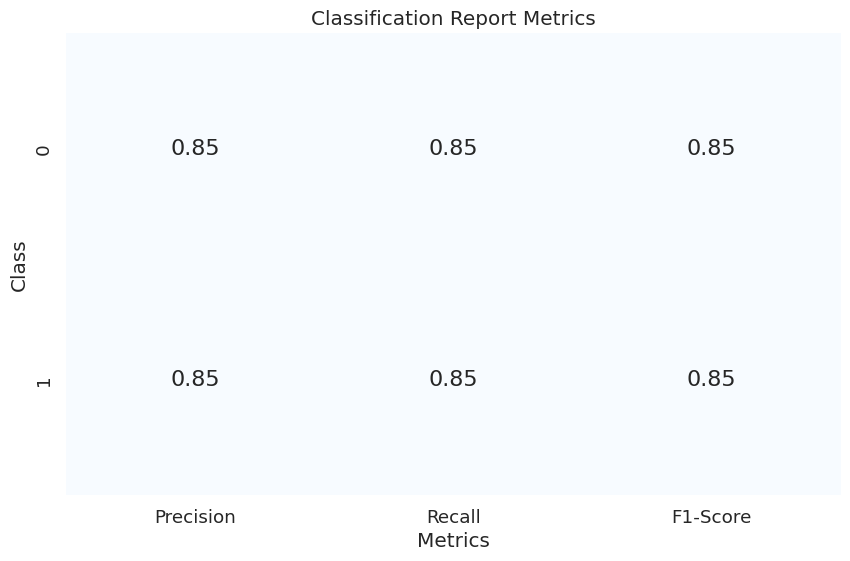

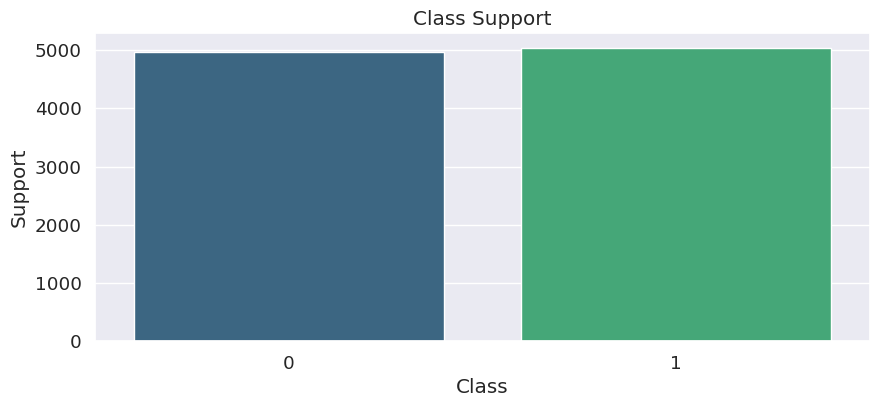

In [ ]:
visualize_classification_report(nb_report)

In [ ]:
import nltk
import random
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Download the movie_reviews dataset if not already downloaded
nltk.download("movie_reviews")

# Define a feature extractor function
def extract_features(document):
    words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in words)
    return features

# Load movie reviews and shuffle them
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

# Get the most common words as features
all_words = FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())[:2000]

# Extract features and labels
featuresets = [(extract_features(d), c) for (d, c) in documents]

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_set)

# Test the classifier
y_true = [c for (_, c) in test_set]
y_pred = [classifier.classify(d) for (d, _) in test_set]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
nltk_report = classification_report(y_true, y_pred, target_names=['Negative', 'Positive'])


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Accuracy: 0.80


In [ ]:
print(movie_reviews.categories()[0])

neg


In [ ]:
print(movie_reviews.fileids(movie_reviews.categories()[0]))
print(movie_reviews.fileids(movie_reviews.categories()[1]))

movie_reviews.words((movie_reviews.fileids(movie_reviews.categories()[0])[0]))


['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt', 'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt', 'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt', 'neg/cv018_21672.txt', 'neg/cv019_16117.txt', 'neg/cv020_9234.txt', 'neg/cv021_17313.txt', 'neg/cv022_14227.txt', 'neg/cv023_13847.txt', 'neg/cv024_7033.txt', 'neg/cv025_29825.txt', 'neg/cv026_29229.txt', 'neg/cv027_26270.txt', 'neg/cv028_26964.txt', 'neg/cv029_19943.txt', 'neg/cv030_22893.txt', 'neg/cv031_19540.txt', 'neg/cv032_23718.txt', 'neg/cv033_25680.txt', 'neg/cv034_29446.txt', 'neg/cv035_3343.txt', 'neg/cv036_18385.txt', 'neg/cv037_19798.txt', 'neg/cv038_9781.txt', 'neg/cv039_5963.txt', 'neg/cv040_8829.txt', 'neg/cv041_22364.txt', 'neg/cv042_11927.txt', 'neg/cv043_16808.t

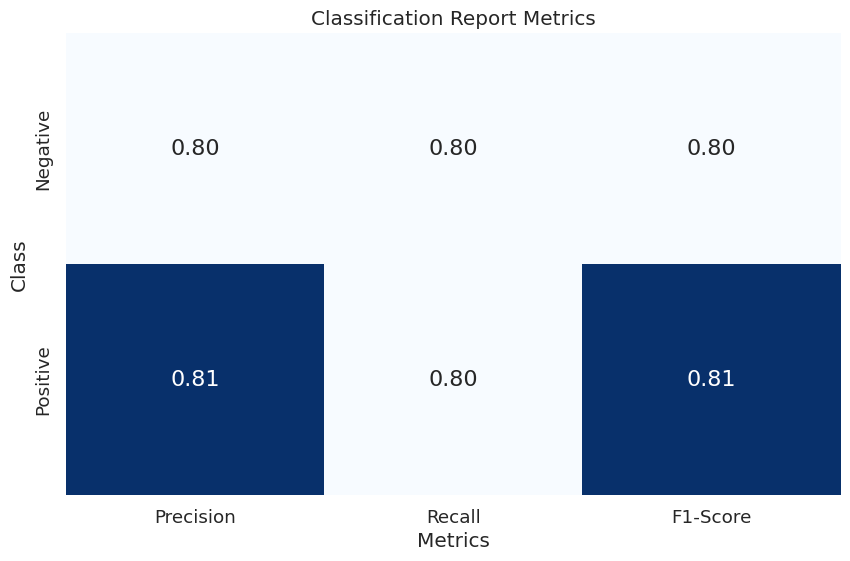

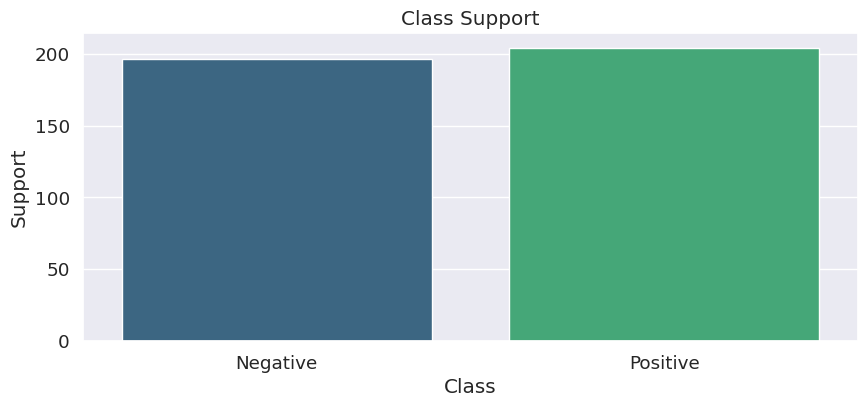

In [ ]:
visualize_classification_report(nltk_report)

In [ ]:
# NLTK
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


In [ ]:
# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()


In [ ]:
# Example of analyzing sentiment of a review
sample_review = imdb_data['review'].iloc[0]
print("Review:", sample_review)
print("Sentiment:", sia.polarity_scores(sample_review))

Review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [ ]:
def sentiment_res(review):
  sentiment = sia.polarity_scores(review)
  neg = sentiment['neg']
  pos = sentiment['pos']
  neutral = sentiment['neu']
  print(f"negative score: {neg}")
  print(f"positive score: {pos}")
  print(f"neutral score: {neutral}")
  return sentiment

In [ ]:
sentiment_res("Seemed okay, the plot was kindof twisted, but was the worst script ever if the climax wouldn't have saved it.")

negative score: 0.319
positive score: 0.054
neutral score: 0.627


{'neg': 0.319, 'neu': 0.627, 'pos': 0.054, 'compound': -0.848}

In [ ]:
sentiment_res("Great movie")

negative score: 0.0
positive score: 0.804
neutral score: 0.196


{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

#Preprocessing the IMDB Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the IMDB Dataset
imdb_data = pd.read_csv(imdb_data_path)

# Basic preprocessing
imdb_data['review'] = imdb_data['review'].str.lower()  # convert to lowercase
imdb_data['review'] = imdb_data['review'].str.replace('<.*?>', '')  # remove HTML tags
imdb_data['sentiment'] = imdb_data['sentiment'].map({'positive': 1, 'negative': 0})  # convert labels to binary

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    imdb_data['review'], imdb_data['sentiment'], test_size=0.2)


<ipython-input-17-ede43eb5d184>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_data['review'] = imdb_data['review'].str.replace('<.*?>', '')  # remove HTML tags


In [ ]:
print(train_texts)

28176    how sad there is no option to post a mark lowe...
1539     american pie has gone a long distance from the...
17088    overall it was a watchable movie. i didn't pau...
13561    this trash version of `romeo and juliet' passe...
21256    an absoloutely wonderful film that works on se...
                               ...                        
36792    i can't believe i waste my time watching this ...
11992    this movie was a rather odd viewing experience...
31085    this is an oriental fantasy about ¨thousand an...
12316    along with virtually every republic picture ev...
49556    although i am not a michael jackson fan, i lik...
Name: review, Length: 40000, dtype: object


#Tokenization and Input Formatting for BERT

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences in the training set
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)

# Tokenize and encode sequences in the testing set
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)


Convert to PyTorch Datasets

In [ ]:
import torch

class IMDBDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Convert to PyTorch datasets
train_dataset = IMDBDataset(train_encodings, train_labels.tolist())
test_dataset = IMDBDataset(test_encodings, test_labels.tolist())


# Load BERT for Sequence Classification

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)


Train and Evaluate the Model

In [ ]:
# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()
